In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image

In [2]:
encoder=OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [3]:
data=[]
paths=[]
result=[]

for dirpath,dirnames,filenames in os.walk('C:/Users/Administrator/Desktop/DATA-SCIENCE/BRAIN/yes'):
    for filename in filenames:
        if '.jpg' in filename:
            paths.append(os.path.join(dirpath,filename))
            
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
    

In [4]:
paths=[]
for dirpath,dirnames,filenames in os.walk('C:/Users/Administrator/Desktop/DATA-SCIENCE/BRAIN/no'):
    for filename in filenames:
        if '.jpg' in filename:
            paths.append(os.path.join(dirpath,filename))
            
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data=np.array(data)
data.shape

(451, 128, 128, 3)

In [6]:
result=np.array(result)
result.shape

(451, 1, 2)

In [7]:
result=result.reshape(451,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=100)

In [9]:
model=Sequential()

model.add(Conv2D(32,(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32,(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,(2,2),activation='relu',padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2,activation='sigmoid'))

model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sOFTMAX'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [13]:
history=model.fit(x_train,y_train,epochs=30,batch_size=40,verbose=1,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/30
9/9 [==============================] - 18s 2s/step - loss: 14.3829 - accuracy: 0.6722 - val_loss: 16.9769 - val_accuracy: 0.3297
Epoch 2/30
9/9 [==============================] - 15s 2s/step - loss: 2.7500 - accuracy: 0.8056 - val_loss: 5.0182 - val_accuracy: 0.5934
Epoch 3/30
9/9 [==============================] - 15s 2s/step - loss: 0.9460 - accuracy: 0.8889 - val_loss: 3.8113 - val_accuracy: 0.3956
Epoch 4/30
9/9 [==============================] - 18s 2s/step - loss: 0.4371 - accuracy: 0.9333 - val_loss: 2.6270 - val_accuracy: 0.4286
Epoch 5/30
9/9 [==============================] - 16s 2s/step - loss: 0.2033 - accuracy: 0.9639 - val_loss: 2.2638 - val_accuracy: 0.4176
Epoch 6/30
9/9 [==============================] - 15s 2s/step - loss: 0.0854 - accuracy: 0.9778 - val_loss: 1.2722 - val_accuracy: 0.5604
Epoch 7/30
9/9 [==============================] - 14s 2s/step - loss: 0.0699 - accuracy: 0.9833 - val_loss: 1.0783 - val_accuracy: 0.5934
Epoch 8/30
9/9 [================

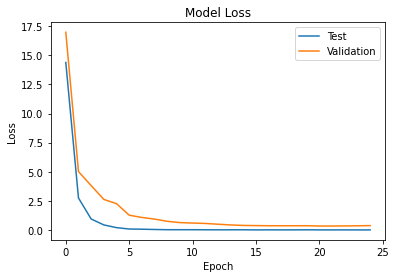

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'])
plt.show()

In [15]:
def answer(number):
    if number==0:
        return 'Its a Tumour'
    else:
        return 'Its not a Tumour'

1/1 [==============================] - 0s 35ms/step
Its a Tumour


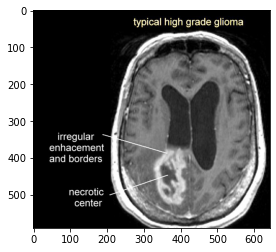

In [20]:
from matplotlib.pyplot import imshow
img= Image.open('mri_typical_gbm_bmc_1207.jpg')
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict(x)
classification=np.where(res==(np.amax(res)))[1][0]
imshow(img)
print(answer(classification))

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
print(confusion_mtx)

3/3 [==============================] - 1s 220ms/step
[[55  6]
 [ 4 26]]
